# Master the Most Time-consuming Task in DS/ML, Part I
## Dealing with common data problems
<img src='images/clean2.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@thecreative_exchange?utm_source=medium&utm_medium=referral'>Steve Johnson</a>
        on 
        <a href='https://unsplash.com/?utm_source=medium&utm_medium=referral'>Unsplash</a>
    </strong>
</figcaption>

### Introduction <small id='intro'></small>

Sometimes, I have little dosages of OCD ([Obsessive Compulsive Disorder](https://en.wikipedia.org/wiki/Obsessive%E2%80%93compulsive_disorder#:~:text=Obsessive%E2%80%93compulsive%20disorder%20(OCD),distress%20or%20impairs%20general%20functioning.)). People with OCD are generally thought of as perfectionists, sometimes, a pain in the a-word, but turns out it is a gold quality in data cleaning. 

See, one of the common traits of OCDs is that they are always compelled to clean something, regardless of whether they enjoy the process or not. It is certainly not the case for my own room (I said sometimes), but I enjoy data cleaning. Turning the dirties data frames into nice-looking, index-ordered, lower case column labeled data is a real delight for me)))

In that way, I am very fortunate. Because anyone in the data field spends, on average, 80% of their time preparing their data. Often in data cleaning, people get frustrated and will be miserable because of all the damn variations of infinite problems they have to deal with.

> Data scientists spend 60% of their time on cleaning and organizing data. Collecting data sets comes second at 19% of their time, meaning data scientists spend around 80% of their time on preparing and managing data for analysis. 57% of data scientists regard cleaning and organizing data as the least enjoyable part of their work and 19% say this about collecting data sets. [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#718bbc696f63)

So, enriching your toolkit with best and fastest methods should be one of your main goals to master the most time-consuming task in DS/ML. To help you with that, I am planning to write a series of articles from beginner to advanced. Tonight's special is your every-day, common data problems and how to tackle them.

### Setup <small id='setup'></small>

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

For sample data, I will mostly be creating 'dirty' data myself and will be using some of the datasets from these two links which give a list of dirty datasets to practice: [Link 1](https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/) and [Link 2](https://foresightbi.com.ng/microsoft-power-bi/dirty-data-samples-to-practice-on/). Definitely check out those datasets to flex your data cleaning muscles💪.

> If you don't understand some of the syntax I will be using to create sample 'dirty' data frames, you can skip those parts and focus on the cleaning part.

### Data Type Constraints <small id='type'></small>

Having the correct data type for each observation in the dataset is crucial. Generally, any data should belong to one of these types:
- `int` or `float` - numeric
- `str` - any text data
- `bool` - boolean (**True** or **False**)
- `datetime` - dates
- `category` - a finite set of values for one variable (do not confuse with string!)

If not dealt, incorrect data types may lead to misleading results during analyses and often go undetected.

One thing you should understand is that people who collect the data may not be specialists in data engineering or any data-related fields and probably won't have a clue of what represents clean data. They do whatever it takes to record necessary information in as easy manner for them as possible. This will often result in human errors such as typos, adding unnecessary characters, representing the same information in many formats... the possibilities are endless.

The first common data problem is having numeric data as strings:

In [2]:
hospital = pd.read_excel('data/hospital.xlsx')
hospital.sample(5)

,Description,Basic Unit,Beginning Balance,Quantity Received,Quantity Dispensed,Losses and Adjustments,Ending Balance (Physical Count)
99,Tabs Ascorbic acid 100mg,1000's,0,0,0,0,0
4554,Susp Metronidazole,Bottles,120,0,0,0,0
1923,Tabs Metronidazole 200mg,100's,0,0,0,0,0
3600,susp Metronidazole 100mg/5ml,Bottle,0,50,42,0,8
3805,Susp. Co-trimoxazole 240mg/5ml,Bottle,0,0,0,0,0


A handy attribute of data frames is `dtypes` which allows for a quick overview of data types of all variables:

In [3]:
hospital.dtypes

Description                        object
Basic Unit                         object
Beginning Balance                  object
Quantity Received                  object
Quantity Dispensed                 object
Losses and Adjustments             object
Ending Balance (Physical Count)    object
dtype: object

`info` method offers the same information with some extra details:

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Description                      5846 non-null   object
 1   Basic Unit                       5846 non-null   object
 2   Beginning Balance                5846 non-null   object
 3   Quantity Received                5846 non-null   object
 4   Quantity Dispensed               5846 non-null   object
 5   Losses and Adjustments           5846 non-null   object
 6   Ending Balance (Physical Count)  5846 non-null   object
dtypes: object(7)
memory usage: 319.8+ KB


It is obvious that the data types for the last 5 columns are incorrect. Quantities should either be integers or floats but `pandas` imported them as string (object). It is possible that some of the numbers contain non-numeric characters which may lead to such problems. 

First of all, let's convert all the columns to lower and snake_case which allows for easier operations:

In [5]:
def clean_col_names(df):
    """
    Simple function to convert the column 
    names of a dataframe to snake_case and lower case.
    """
    # Get all the col names as lower and snake_case in a list
    new_col_names = [
        column.strip().replace(' ', '_').lower() for column in df.columns
    ]
    # Rename the column names
    df.columns = new_col_names

    return df

In [6]:
hospital = clean_col_names(hospital)
hospital.columns

Index(['description', 'basic_unit', 'beginning_balance', 'quantity_received',
       'quantity_dispensed', 'losses_and_adjustments',
       'ending_balance_(physical_count)'],
      dtype='object')

Now, let's store the columns with incorrect data types in a list:

In [7]:
incorrect = hospital.columns[2:] # The last 5

Converting columns to numeric data type is easy using `pd.to_numeric`:

In [8]:
for col in incorrect:
    hospital[col] = pd.to_numeric(hospital[col], errors='coerce')

The function has `errors` parameter which lets us control what happens to values that do not convert to numeric. If set to `coerce`, `pandas` puts `NaN`s in place of inconsistent values. Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) of the function for more details.

In [9]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   description                      5846 non-null   object 
 1   basic_unit                       5846 non-null   object 
 2   beginning_balance                5844 non-null   float64
 3   quantity_received                5839 non-null   float64
 4   quantity_dispensed               5842 non-null   float64
 5   losses_and_adjustments           5845 non-null   float64
 6   ending_balance_(physical_count)  5842 non-null   float64
dtypes: float64(5), object(2)
memory usage: 319.8+ KB


As you see, we have the columns in the correct format and very few of the observations were converted to `NaN`s. How we deal with `NaN`s or missing values is an entirely another topic and probably, I will discuss them in future articles.

Note that I chose to drop the inconsistent values because there were only few of them and each case was unique. In such situations, if you try to correct them individually, it will be a huge time-suck and lots of frustration. However, if there are some patterns as to why some values are inconsistent, you should try to deal with them using custom functions and methods.

Another common problem is having categorical data represented as strings or integers. For example, let's say I have a data frame containing the marriage status of 1000 people. If I choose the status as integers 0, 1, 2 `pandas` by default interprets or imports them as integers:

In [10]:
# Create a sample data for illustration
df = pd.DataFrame(np.random.choice([0, 1, 3], 1000),
                  columns=['marriage_status'])
df.marriage_status.sample(5)

952    1
85     0
61     1
467    0
258    1
Name: marriage_status, dtype: int32

Having categories represented as numeric will lead to misleading results during the analysis:

In [11]:
df.describe()

,marriage_status
count,1000.000000
mean,1.313000
std,1.233918
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,3.000000


As `pandas` is treating the `marriage` as a numeric data type, `describe` gives us summary statistics which is not what we want. Let's set the column as categorical and call `describe` once again:

In [12]:
df['marriage_status'] = df['marriage_status'].astype('category')  # set as a categorical
df.describe()

,marriage_status
count,1000
unique,3
top,1
freq,347


There is also the case where categories are given as strings. Even though it is not a big issue for some categories, it certainly is when there are multiple categories and they have a particular ordering. 

For instance, let's say there is a column in the data source which categorizes the car size into 5 groups: small, medium small, medium, medium large, large. If you import the file, `pandas` will definitely read them as strings. For such cases, setting the column as categorical is not enough, you should also define the order:

In [13]:
# Create a sample data for illustration
car_sizes = ['medium small', 'small', 'medium large', 'large', 'medium',]
distribution = np.random.choice(car_sizes,
                                size=5000,
                                p=[0.2, 0.3, 0.1, 0.15, 0.25])
df = pd.DataFrame(distribution, columns=['car_size'])
df.dtypes

car_size    object
dtype: object

Let's plot a count plot to see the sum of each category:

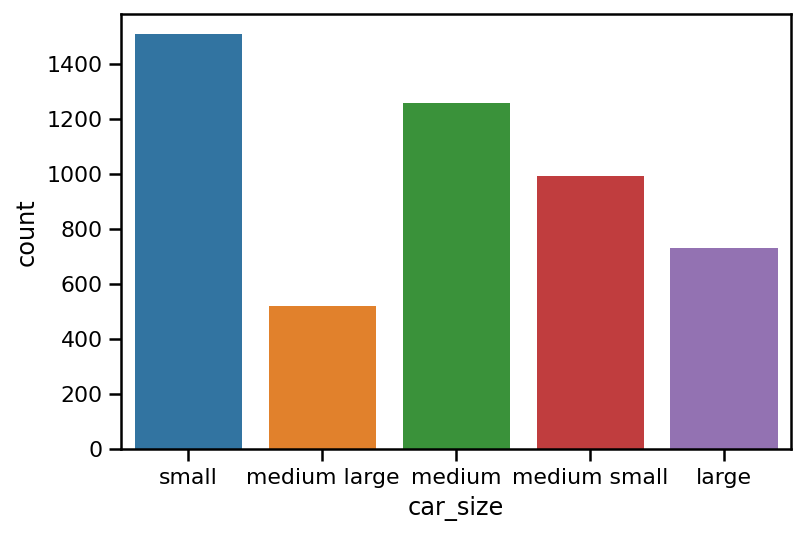

In [14]:
sns.countplot(df['car_size']);

You can see that in a count plot, the results can be misleading if you don't set the categories straight.

In [15]:
# Create the list of ordered categories
order = ['small', 'medium small', 'medium', 'medium large', 'large']

# Setting as categorical with order
df['car_size'] = pd.Categorical(df['car_size'], categories=order, ordered=True)
df.dtypes

car_size    category
dtype: object

For categorical data that requires more control, use `pd.Categorical`. Its first argument should be an array-like object like data frame column and you should pass the categories to `categories` setting `ordered` to True.

The same count plot:

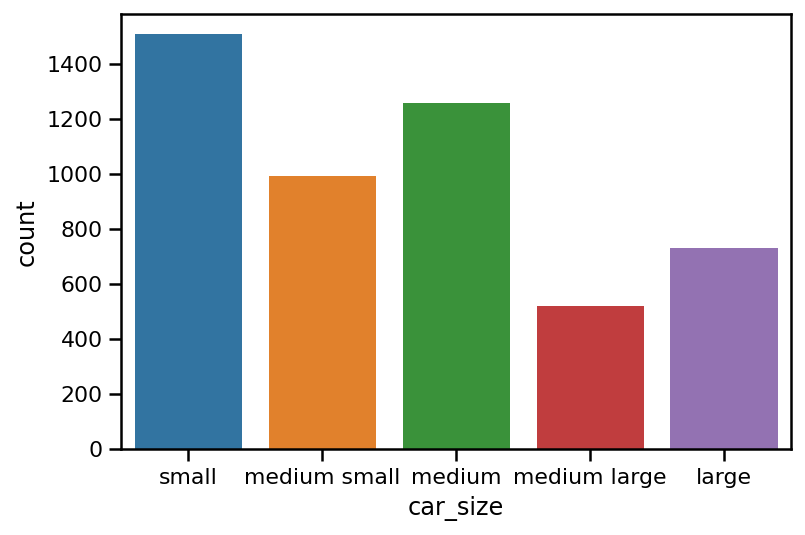

In [16]:
sns.countplot(df['car_size']);

Now, the categories are in the right order.

### Data Range Constraints <small id='range'></small>

Another class of data problems is related to data ranges. Often, these problems can be seen with date and numeric data. For example, dates in the future, over 100-110 and negative age of a person, or any other value that does not make sense based on the real-world or business assumptions. 

For example, if you have a dataset of movies containing their rating up to 5 and the ratings were over that threshold, it is a potential issue:

In [17]:
# Create a sample of 1000 movie ratings
ratings = [1, 2, 3, 4, 5, 6]
probs = [0.15, 0.15, 0.2, 0.25, 0.2, 0.05]
distribution = np.random.choice(ratings, size=1000, p=probs)

movies = pd.DataFrame(distribution, columns=['movie_rating'])
movies.sample(5)

,movie_rating
581,5
296,2
807,5
475,4
457,6


To spot data range errors for numeric data, histograms are very useful:

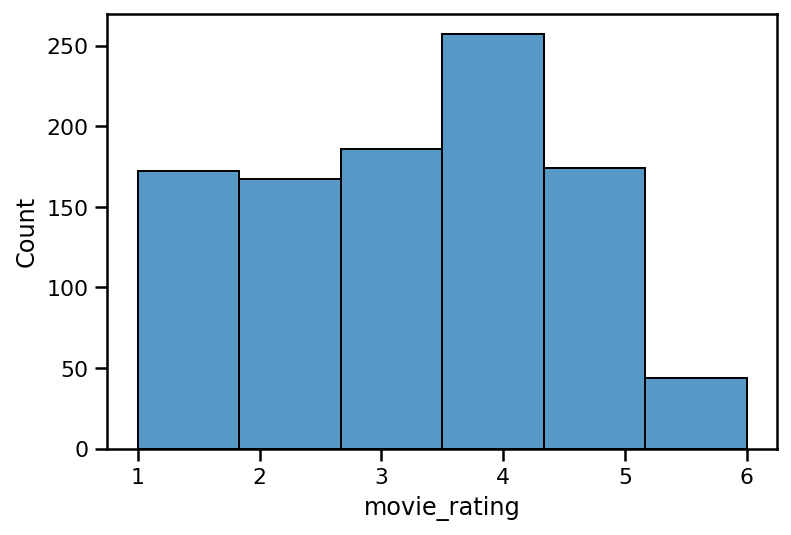

In [18]:
sns.histplot(movies['movie_rating'], bins=6);

In our fake data, we can see that there are some movies with ratings above 5. How do we deal with such out of range values? There are 4 ways we can approach them:
- Dropping
- Setting custom minimums and maximums
- Treat as missing and impute
- Setting custom value depending on business assumptions

Of all the above 4, dropping should be your last choice because you might miss out on important information. The other methods are fairly self-explanatory. Let's see the implementation of some of the above methods:

In [19]:
# Dropping with filtering
movies = movies[movies['movie_rating'] <= 5]

# Droping with .drop()
movies.drop(movies[movies['movie_rating'] > 5].index, inplace=True)

# Check the results
assert movies['movie_rating'].max() <= 5

`.drop` accepts a list of indexes from the data frame and drops them. To verify that our operations succeeded, we used an `assert` statement which returns no output if the condition after the keyword evaluates to `True`.

Now, let's revert back the changes and see how to set custom maximum:

In [20]:
# Revert back the changes
ratings = [1, 2, 3, 4, 5, 6]
probs = [0.15, 0.15, 0.2, 0.20, 0.25, 0.05]
distribution = np.random.choice(ratings, size=1000, p=probs)

In [21]:
# Convert movie_rating > 5 to 5
movies.loc[movies['movie_rating'] > 5, 'movie_rating'] = 5
# Assert statement again
assert movies['movie_rating'].max() <= 5

This time, we use the data frame `.loc` accessor to subset with condition and choose the `movie_rating` column and set the out of range values to 5. 

Let's see an example involving dates:

In [22]:
# Create sample dirty data
dates = np.random.choice(pd.date_range(start='2010-01-01', end='2022-01-01'),
                         size=5000)
subscriptions = pd.DataFrame(dates, columns=['sub_date'])
subscriptions.sample(5)

,sub_date
89,2014-12-19
4358,2013-04-18
822,2018-06-27
3934,2014-04-12
3911,2014-05-17


I created a sample data frame which contain some dates in the future. With real data, such cases may appear where you have recorded appointments from the future, values that record events later than the collection of the data, etc. 

Same as before, you can choose to drop out of range dates or replace them with a hard limit. For our fake subscriptions dataset, let's replace all the values which are higher than today's date. Don't forget to set the column as a date type when you have real-world data:

In [23]:
# Set as datetime
subscriptions['sub_date'] = pd.to_datetime(subscriptions['sub_date'])
# Check the conversion with an assert statement
assert subscriptions['sub_date'].dtype == 'datetime64[ns]'

To get today's date, we will use the `datetime` package which we imported in the beginning of the post:

In [24]:
# Get today's date
today = dt.date.today()

This time, without dropping, we will replace any dates in the future with today's date:

In [25]:
# Replace any value higher than today with today's date
subscriptions.loc[subscriptions['sub_date'] > pd.to_datetime(today),
                  'sub_date'] = today
# Check the result
assert subscriptions['sub_date'].max() == today

If you noticed, I also wrapped today's date within the `pd.to_datetime` function. I won't cover the reason but you can take a look at [this](https://stackoverflow.com/questions/51827134/comparison-between-datetime-and-datetime64ns-in-pandas) StackOverflow thread to find out.

### Uniqueness Constraints <small id='unique'></small>

In other words, duplicate data. It generally comes in two forms:
- full duplicates - all the columns have the exact same data
- partial duplicates - some of the columns have repeated data

Duplicates often arise because of bugs, errors in design, data entry and most commonly when multiple sources are joined into one. Let's look at an example of duplicated data:

> I will be creating a sample for the duplicate data, if you don't understand the next code snippet, feel free to move on to the next.

In [26]:
# Create possible values for the fake date
first_names = [
    'Lane', 'Ivor', 'Roary', 'Shannon', 'Abdul', 'Mary', 'Cole', 'Desirae'
]
last_names = ['Reese', 'Pierce', 'Gibson', 'Little', 'Fry', 'Colon', 'Palmer']
address = [
    '534-1559 Nam St.', '102-3364 Non Road', 'P.O. Box 344, 7785 Nisi Ave',
    '691-2550 Consectetuer Street', '4565 Risus St.', '4674 Ut Rd.',
    '102-3364 Non Road', '8366 At, Street'
]
height = [181, 168, 191, 185, 169, 179, 168, 178, 196]
weight = [64, 66, 99, 65, 65, 75, 88, 91, 83]

# Use random choice to populate a 200 row dataset
df_dict = {
    'first_name': np.random.choice(first_names, 500),
    'last_name': np.random.choice(last_names, 500),
    'address': np.random.choice(address, 500),
    'height': np.random.choice(height, 500),
    'weight': np.random.choice(weight, 500),
}
people = pd.DataFrame(df_dict)

In [27]:
people.head()

,first_name,last_name,address,height,weight
0,Lane,Little,102-3364 Non Road,181,65
1,Desirae,Little,102-3364 Non Road,179,75
2,Ivor,Little,102-3364 Non Road,185,83
3,Abdul,Gibson,102-3364 Non Road,178,75
4,Shannon,Palmer,534-1559 Nam St.,185,65


To find the duplicate values in the dataset, we use `.duplicated()` function. By default, it gives us the full duplicates in the dataset:

In [28]:
duplicates = people.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

The result of `.duplicated` is a boolean series which we can use to index our data frame:

In [29]:
people[duplicates]

,first_name,last_name,address,height,weight
180,Ivor,Gibson,4674 Ut Rd.,196,99
190,Ivor,Gibson,102-3364 Non Road,168,75
219,Ivor,Reese,4565 Risus St.,178,64
427,Mary,Palmer,"P.O. Box 344, 7785 Nisi Ave",196,65
451,Abdul,Colon,"8366 At, Street",178,65


The resulting data frame has a length of 5 which means there are 5 pairs of duplicate rows. To have a better control over `.duplicated`, let's explore its parameters:
- `subset` - by default `None`, only consider a subset of columns to identify duplicates
- `keep` - which occurrence of the duplicate to keep, possible values - **\['first', 'last', False\]**

We will get to `subset` later. The default value of `keep` is `first` which means 'keep the first occurrence and mark the rest duplicated'. `last` is the complete opposite and `False` returns all the pairs of duplicates:

In [30]:
people[people.duplicated(keep='last')]

,first_name,last_name,address,height,weight
32,Ivor,Gibson,102-3364 Non Road,168,75
39,Ivor,Reese,4565 Risus St.,178,64
75,Abdul,Colon,"8366 At, Street",178,65
178,Ivor,Gibson,4674 Ut Rd.,196,99
395,Mary,Palmer,"P.O. Box 344, 7785 Nisi Ave",196,65


Note how the indexes of rows are different now from the previous result.

In [31]:
full_duplicates = people[people.duplicated(keep=False)].sort_values(
                                        by=['first_name', 'last_name', 'address'])
full_duplicates

,first_name,last_name,address,height,weight
75,Abdul,Colon,"8366 At, Street",178,65
451,Abdul,Colon,"8366 At, Street",178,65
32,Ivor,Gibson,102-3364 Non Road,168,75
190,Ivor,Gibson,102-3364 Non Road,168,75
178,Ivor,Gibson,4674 Ut Rd.,196,99
180,Ivor,Gibson,4674 Ut Rd.,196,99
39,Ivor,Reese,4565 Risus St.,178,64
219,Ivor,Reese,4565 Risus St.,178,64
395,Mary,Palmer,"P.O. Box 344, 7785 Nisi Ave",196,65
427,Mary,Palmer,"P.O. Box 344, 7785 Nisi Ave",196,65


In [32]:
full_duplicates.shape

(10, 5)

These were full duplicates. Let's move on to partial duplicates. 

We will check for rows that has the same full name and address:

In [33]:
partial = people.duplicated(subset=['first_name', 'last_name', 'address'],
                            keep=False)
partial_duplicates = people[partial].sort_values(
    by=['first_name', 'last_name', 'address'])
partial_duplicates.head(6)

,first_name,last_name,address,height,weight
79,Abdul,Colon,102-3364 Non Road,185,64
371,Abdul,Colon,102-3364 Non Road,196,75
72,Abdul,Colon,4565 Risus St.,169,75
184,Abdul,Colon,4565 Risus St.,169,83
75,Abdul,Colon,"8366 At, Street",178,65
384,Abdul,Colon,"8366 At, Street",168,91


How to deal with duplicates? For full duplicates, it is easy. We will just drop one of the observations using `.drop_duplicates`:

In [34]:
people.drop_duplicates(inplace=True)

Set `inplace` to `True` so that the change is done 'inplace' rather than returning a new data frame. 

For partial duplicates, it is a bit tricky because you don't really know which one to keep when dropping. For our case, where we have identical address and full names, what you could is to collapse the duplicate pairs into one taking the average of height and weight. You can also choose one value based on common sense like, "What is the likely height for someone who weighs 75 kgs?". Each duplicate value will be unique to your data and you should decide wisely what to do. 

For our fake data, let's just drop the first duplicate occurrence. Same as `.duplicated`, `.drop_duplicates` have a `subset` parameter:

In [35]:
people.drop_duplicates(subset=['first_name', 'last_name', 'address'],
                       keep='last',
                       inplace=True)